In [20]:
from pdf2image import convert_from_path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from imutils.object_detection import non_max_suppression


In [21]:
# pdf_pages = convert_from_path("pdfs/Consulting agreement.pdf")
# page_count = len(pdf_pages)
# pdf_images = []
# print(page_count)
#
# for page in pdf_pages:
#     pdf_images.append(np.array(page))

image = cv2.imread("pdfs/8_diamonds.png")
thres = 0.8

Load in template and change it to a grayscale

The code below currently misses correctly identifying the template. Likely die to a scale miss match.

In [22]:
template = cv2.imread("templates/diamonds_template.png")

template_gray = cv2.cvtColor(template, cv2.COLOR_BGRA2GRAY)

(tH, tW) = template_gray.shape[:2]



loop through each of the pdf pages and look for the template

In [23]:

found = None
page_count = 1

template_results = []


# gray_page = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
# for scale in np.linspace(0.2, 1.0, 20)[::-1]:  # start from 100% of the original size of the image and work our way down to 20% of the original size in 20 equally sized percent chunks
#     resized_im = imutils.resize(gray_page, width = int(gray_page.shape[1] * scale))
#     resizing_ratio = gray_page.shape[1] / float(resized_im.shape[1])  # ratio of the resizing
#     if resized_im.shape[0] < tH or resized_im.shape[1] < tW:  # break if smaller than template
#         break
#     result = cv2.matchTemplate(resized_im, template_gray, cv2.TM_CCOEFF_NORMED)
#
#
#
#     (minVal, maxVal, minLoc, maxLoc)  = cv2.minMaxLoc(result)
#     if found is None or maxVal > found[0]:
#         found = (maxVal, maxLoc, resizing_ratio)
# template_results.append([page_count, found])
# found = None
# page_count += 1

gray_page = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)

result = cv2.matchTemplate(gray_page, template_gray, cv2.TM_CCOEFF_NORMED)

print(result)




[[ 2.78362274e-01  2.78436750e-01  2.78545618e-01 ... -9.40483287e-02
  -1.02528848e-01 -1.11119419e-01]
 [ 2.72381902e-01  2.72861391e-01  2.73123175e-01 ... -9.98222977e-02
  -1.08950727e-01 -1.18652150e-01]
 [ 2.65036523e-01  2.66073108e-01  2.66866058e-01 ... -1.06389336e-01
  -1.15809187e-01 -1.25818044e-01]
 ...
 [ 1.82381019e-01  1.74819350e-01  1.64629892e-01 ... -2.81631667e-02
  -3.16808857e-02 -3.56311053e-02]
 [ 1.82145879e-01  1.74420550e-01  1.64145917e-01 ... -1.12965945e-02
  -1.51590882e-02 -1.97034851e-02]
 [ 1.82424754e-01  1.74353465e-01  1.64115593e-01 ...  4.12988942e-03
   2.57350708e-04 -4.53877263e-03]]


In [24]:
(yCoords, xCoords) = np.where(result >= thres)
print(yCoords)

[146 146 146 146 146 146 146 147 147 147 147 147 147 147 147 148 148 148
 148 148 148 148 148 149 149 149 149 149 149 149 150 150 150 150 150 150
 150 151 151 151 151 151 151 151 152 152 152 152 152 152 152 153 153 153
 153 153 153 153 154 154 154 154 154 154 154 154 155 155 155 155 155 155
 155 155 155 155 155 155 155 155 156 156 156 156 156 156 156 156 156 156
 156 156 156 156 156 157 157 157 157 157 157 157 157 158 158 158 158 158
 158 158 158 159 159 159 159 159 159 159 159 160 160 160 160 160 160 160
 160 161 161 161 161 161 161 161 161 162 162 162 162 162 162 162 162 163
 163 163 163 163 163 163 163 164 164 164 164 164 164 164 230 230 231 231
 231 231 231 231 231 232 232 232 232 232 232 232 232 233 233 233 233 233
 233 233 233 234 234 234 234 234 234 234 234 235 235 235 235 235 235 235
 235 236 236 236 236 236 236 236 236 237 237 237 237 237 237 237 237 238
 238 238 238 238 238 238 238 239 239 239 239 239 239 239 240 240 240 240
 240 304 304 304 304 304 305 305 305 305 305 305 30

In [25]:
# (_, maxLoc, resizing_ratio) = found = template_results[0][1]
# (startX, startY) = (int(maxLoc[0] * resizing_ratio), int(maxLoc[1] * resizing_ratio))
# (endX, endY) = (int((maxLoc[0] + tW) * resizing_ratio), int((maxLoc[1] + tH) * resizing_ratio))

rects = []

# loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
	# update our list of rectangles
	rects.append((x, y, x + tW, y + tH))

pick = non_max_suppression(np.array(rects))

print("[INFO] {} matched locations *after* NMS".format(len(pick)))

[INFO] 8 matched locations *after* NMS


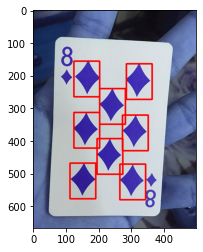

In [26]:
# cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 3);
# plt.imshow(image)
for (startX, startY, endX, endY) in pick:
	# draw the bounding box on the image
	cv2.rectangle(image, (startX, startY), (endX, endY),
		(255, 0, 0), 3)
plt.imshow(image)

In [27]:

# cv2.imshow("im", pdf_images[1])
# cv2.imshow("Template", template)
# cv2.waitKey(0)

import os

pdf_files = os.listdir("pdfs")
print(pdf_files)
templates = os.listdir("templates")

['8_diamonds.png', 'Copy of US.pdf', 'Newsletter.pdf', 'Brochure.pdf', 'Consulting agreement.pdf', 'Copy of Flyer US Letter.pdf']
